## Xcorr vs deltCN. Compil vs 51db
### Supplemental figures

In [61]:
import glob, os
import matplotlib
import matplotlib.pyplot as plt
from itertools import chain
from metaproteomics.file_processing import blazmass_tools
import numpy as np
import sys
from socket import gethostname
from string import ascii_uppercase
from collections import defaultdict
%matplotlib inline

FOLDERC = "/mongoc/gstupp/DTASelect/unenriched/121614_SC_sampleH1sol_pepstd_HCD35/indexDB_search_10ppm_50ppmfrag/"
FOLDER51 = "/mongoc/gstupp/DTASelect/unenriched/121614_SC_sampleH1sol_pepstd_HCD35/51db_human_search_noProtDB_10ppm_50ppmfrag/"

dtaselectfilter_path51 = os.path.join(FOLDER51, 'DTASelect-filter.txt')
dtaselectfilter_pathC = os.path.join(FOLDERC, 'DTASelect-filter.txt')

In [62]:
def get_pep_scores(dtaselectfilter_path):
    pep_score = dict()
    parser = blazmass_tools.dta_select_parser(dtaselectfilter_path)
    for scan in parser:
        for pep_dict in scan['peptides']:
            pep_score[pep_dict['aa_sequence']] = (pep_dict['XCorr'],pep_dict['DeltCN'])
    return pep_score

In [63]:
pep_score51 = get_pep_scores(dtaselectfilter_path51)
pep_scoreC = get_pep_scores(dtaselectfilter_pathC)
list(pep_score51.items())[:5]

[('IPAVYDAVK', (2.2891135, 0.30016208)),
 ('IANVFTNAFR', (3.3546903, 0.4186319)),
 ('ARVDDALHATR', (2.4847631, 0.3964401)),
 ('VEALGSILSFLEHQK', (3.1979735, 0.36981392)),
 ('IDQGIDVVEK', (2.6522696, 0.28695172))]

In [64]:
print("Number of PSMs in 51db: {}".format(len(pep_score51)))
print("Number of PSMs in compil: {}".format(len(pep_scoreC)))
PSM_both = set(pep_score51.keys()) & set(pep_scoreC.keys())
print("Number of PSMs in both: {}".format(len(PSM_both)))
print("Number of PSMs in 51db only: {}".format(len(set(pep_score51.keys()) - set(pep_scoreC.keys()))))
print("Number of PSMs in compil only: {}".format(len(set(pep_scoreC.keys()) - set(pep_score51.keys()))))

Number of PSMs in 51db: 11716
Number of PSMs in compil: 24897
Number of PSMs in both: 8315
Number of PSMs in 51db only: 3401
Number of PSMs in compil only: 16582


In [65]:
#PSMs only in compil (not in 51db)
compil_only = set(pep_scoreC.keys()) - set(pep_score51.keys())
xcorr_conly, deltcn_conly = zip(*[(v[0],v[1]) for k,v in pep_scoreC.items() if k in compil_only])

#PSMs only in 51db
db51_only = set(pep_score51.keys()) - set(pep_scoreC.keys())
xcorr_51only, deltcn_51only = zip(*[(v[0],v[1]) for k,v in pep_score51.items() if k in db51_only])

# all compil PSMs
xcorr_all, deltcn_all = zip(*[(v[0],v[1]) for k,v in pep_scoreC.items()])

# all 51db PSMs
xcorr_all_51, deltcn_all_51 = zip(*[(v[0],v[1]) for k,v in pep_score51.items()])

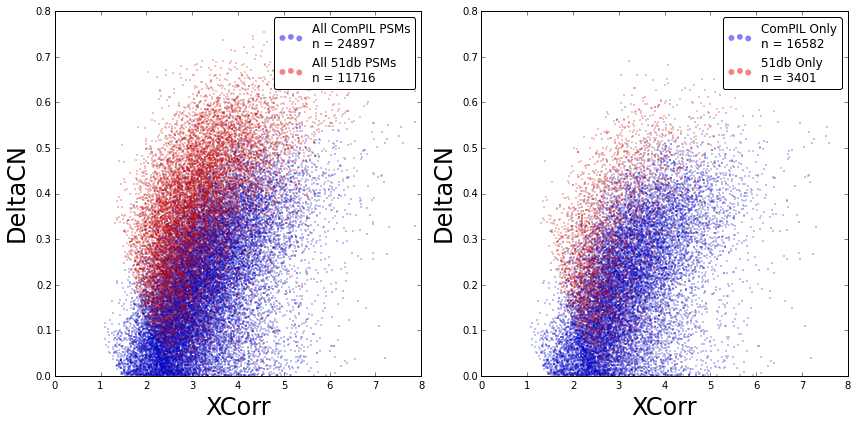

In [80]:
circlearea = 2
legend_marker_size = 5
opacity = 0.5
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(xcorr_all, deltcn_all, c = 'b', alpha = opacity, label = 'All ComPIL PSMs\nn = {}'.format(len(pep_scoreC)), lw=0.1, s=2)
ax.scatter(xcorr_all_51, deltcn_all_51, c = 'r', alpha = opacity, label = 'All 51db PSMs\nn = {}'.format(len(pep_score51)), lw=0.1, s=2)
#ax.scatter(xcorr_conly, deltcn_conly, c = 'r', alpha = opacity, label = 'Compil Only', lw=0.1, s=2)
#ax.scatter(xcorr_51only, deltcn_51only, c = 'g', alpha = opacity, label = '51db Only', lw=0.1, s=2)
ax.set_xlabel('XCorr',fontsize=24)
ax.set_ylabel('DeltaCN',fontsize=24)
ax.set_xlim(left = 0, right = 8)
ax.set_ylim(bottom = 0, top = 0.8)
ax.legend(loc='upper right', markerscale=4, fancybox=True)
ax = fig.add_subplot(122)
ax.scatter(xcorr_conly, deltcn_conly, c = 'b', alpha = opacity, label = 'ComPIL Only\nn = {}'.format(len(compil_only)), lw=0.1, s=2)
ax.scatter(xcorr_51only, deltcn_51only, c = 'r', alpha = opacity, label = '51db Only\nn = {}'.format(len(db51_only)), lw=0.1, s=2)
ax.set_xlabel('XCorr',fontsize=24)
ax.set_ylabel('DeltaCN',fontsize=24)
ax.set_xlim(left = 0, right = 8)
ax.set_ylim(bottom = 0, top = 0.8)
ax.legend(loc='upper right', markerscale=4, fancybox=True)
plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(sqt_path,"xcorr_deltcn.png"), orientation='landscape', dpi=300)

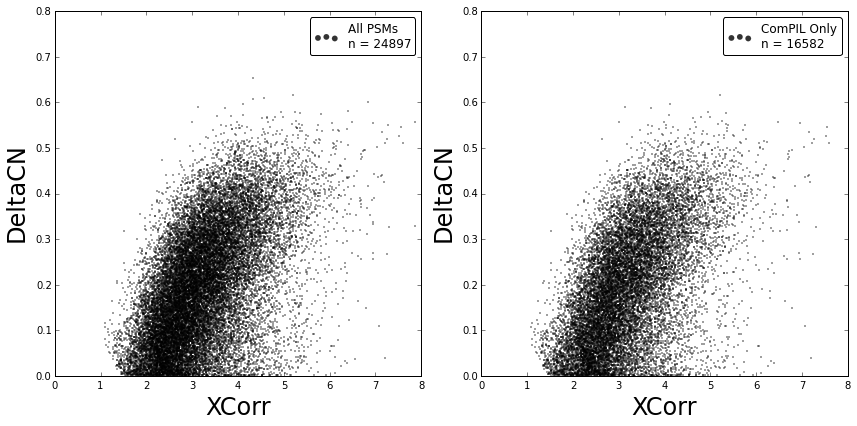

In [77]:
circlearea = 2
legend_marker_size = 5
opacity = 0.8
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(xcorr_all, deltcn_all, c = 'k', alpha = opacity, label = 'All PSMs\nn = {}'.format(len(pep_scoreC)), lw=0.1, s=2)
ax.set_xlabel('XCorr',fontsize=24)
ax.set_ylabel('DeltaCN',fontsize=24)
ax.set_xlim(left = 0, right = 8)
ax.set_ylim(bottom = 0, top = 0.8)
ax.legend(loc='upper right', markerscale=4, fancybox=True)
ax = fig.add_subplot(122)
ax.scatter(xcorr_conly, deltcn_conly, c = 'k', alpha = opacity, label = 'ComPIL Only\nn = {}'.format(len(compil_only)), lw=0.1, s=2)
ax.set_xlabel('XCorr',fontsize=24)
ax.set_ylabel('DeltaCN',fontsize=24)
ax.set_xlim(left = 0, right = 8)
ax.set_ylim(bottom = 0, top = 0.8)
ax.legend(loc='upper right', markerscale=4, fancybox=True)

plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(sqt_path,"xcorr_deltcn.png"), orientation='landscape', dpi=300)